___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


## Get the Data

** Using pandas to read loan_data.csv as a dataframe called loans.**

In [17]:
df = pd.read_csv('loan_data.csv')

** Using the info(), head(), and describe() methods on loans.**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [19]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [20]:
df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

** A histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**


In [86]:
#Credit policy = 1
cred_one = df[df['credit.policy']==1]
cred_zero = df[df['credit.policy']==0]

In [22]:
cred_one

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,1,home_improvement,0.1189,663.28,11.012050,2.89,742,3660.000000,6863,46.7,4,0,0,1
7706,1,small_business,0.1739,716.95,11.034890,13.51,697,4350.000000,7574,35.6,3,1,0,1
7707,1,all_other,0.1114,393.65,11.225243,7.82,737,3179.958333,10320,8.9,1,0,0,1
7708,1,home_improvement,0.1379,851.89,11.238489,4.45,717,5249.958333,165,2.5,2,0,0,1


(array([  3.,   1.,   1.,   5.,   5., 102., 112., 131., 235., 121., 102.,
        104., 111., 116.,  91.,  79.,  84., 134.,  70.,  52.,  57.,  44.,
         44.,   9.,   6.,   7.,  16.,   5.,   3.,   2.,   2.,   1.,   3.,
          1.,   9.]),
 array([612.        , 617.57142857, 623.14285714, 628.71428571,
        634.28571429, 639.85714286, 645.42857143, 651.        ,
        656.57142857, 662.14285714, 667.71428571, 673.28571429,
        678.85714286, 684.42857143, 690.        , 695.57142857,
        701.14285714, 706.71428571, 712.28571429, 717.85714286,
        723.42857143, 729.        , 734.57142857, 740.14285714,
        745.71428571, 751.28571429, 756.85714286, 762.42857143,
        768.        , 773.57142857, 779.14285714, 784.71428571,
        790.28571429, 795.85714286, 801.42857143, 807.        ]),
 <BarContainer object of 35 artists>)

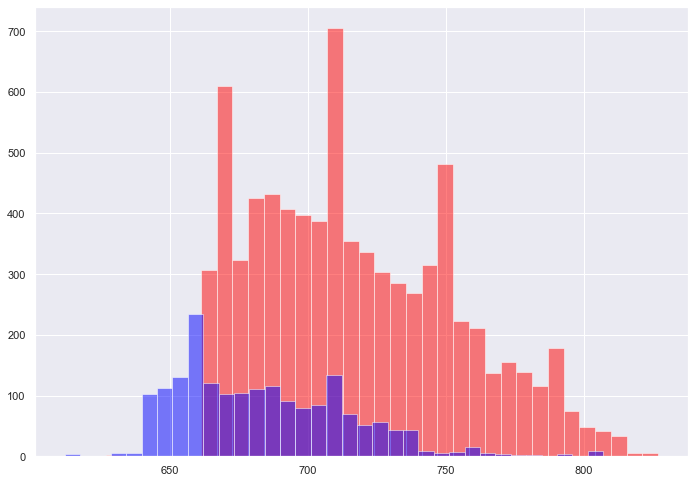

In [87]:
plt.hist(x='fico',data=cred_one,color = 'red',
           alpha = 0.5,bins=35)
plt.hist(x='fico',data=cred_zero,color = 'blue',
            alpha = 0.5,bins=35)

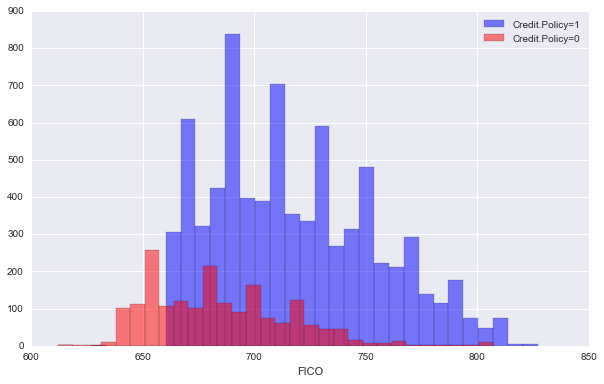

** Similar figure, except this time by the not.fully.paid column.**

In [32]:
#Credit policy = 1
p1 = df[df['not.fully.paid']==0]
p2 = df[df['not.fully.paid']!=0]

(array([  8., 143., 360., 363., 285., 193., 103.,  47.,  21.,  10.]),
 array([617. , 637.5, 658. , 678.5, 699. , 719.5, 740. , 760.5, 781. ,
        801.5, 822. ]),
 <BarContainer object of 10 artists>)

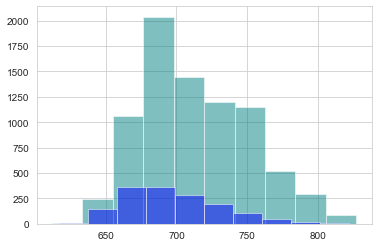

In [35]:
plt.hist(x='fico',data=p1,color = 'teal',
           alpha = 0.5)


plt.hist(x='fico',data=p2,color = 'blue',
            alpha = 0.5)

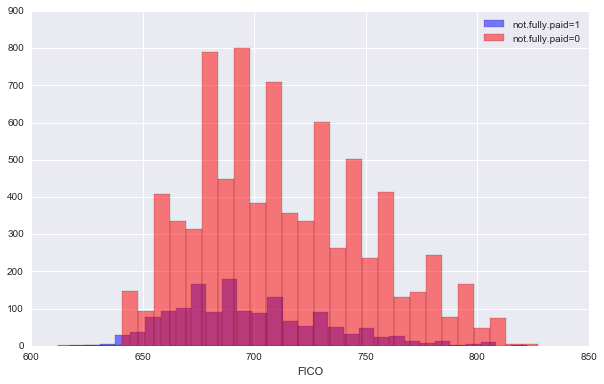

** A countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

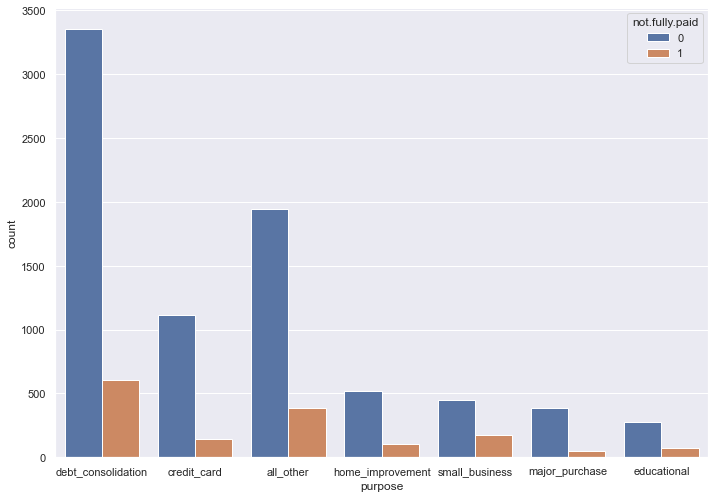

In [40]:
sns.countplot(x=df['purpose'],hue=df['not.fully.paid'])
sns.set(rc={'figure.figsize':(11.7,8.27)})

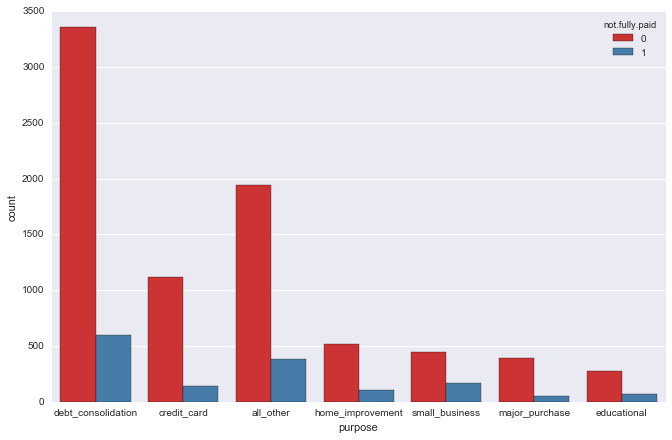

** Observing the trend between FICO score and interest rate(if any). Recreate the following jointplot.**

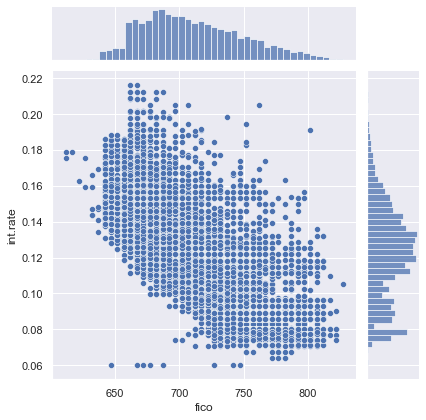

In [41]:
sns.jointplot(x='fico',y='int.rate',data=df)

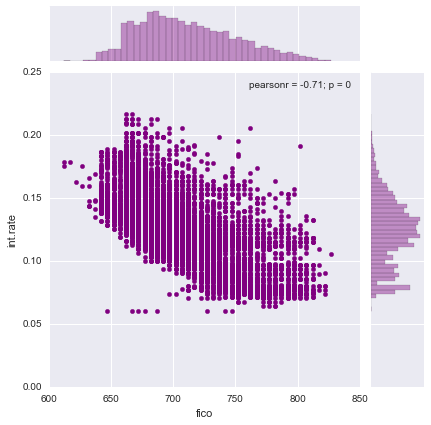

** Creating the following lmplots to see if the trend differed between not.fully.paid and credit.policy. 

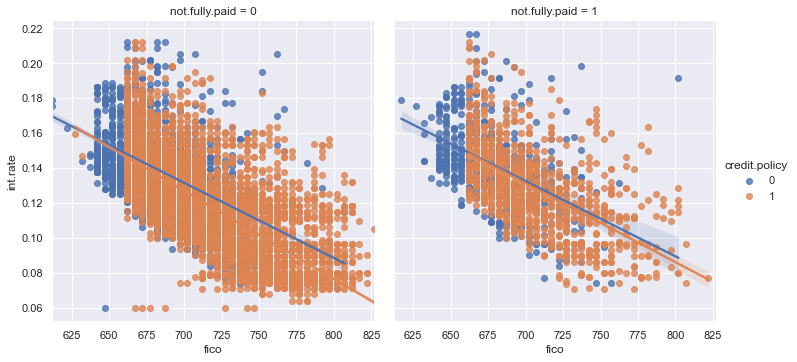

In [51]:
sns.lmplot(x='fico',y='int.rate',data=df,hue='credit.policy',col='not.fully.paid')

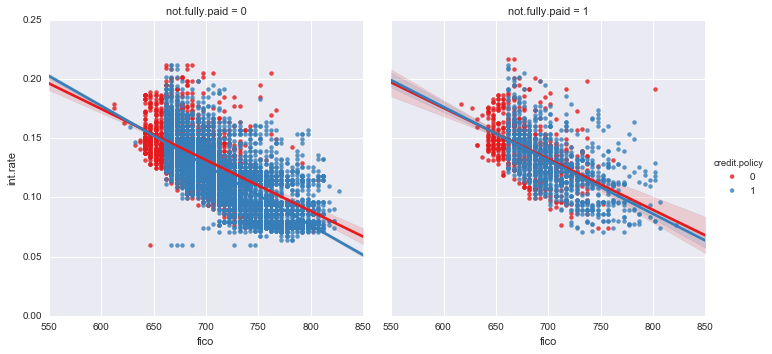

# Setting up the Data

setting up the data for our Random Forest Classification Model!



In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

The **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. I will do this in one clean step using pd.get_dummies.


**Creating a list of 1 element containing the string 'purpose'.**

In [54]:
cat_feats = ['purpose']

**Converting categorical variable into dummy/indicator variables.**

In [64]:
new = pd.get_dummies(df,columns=cat_feats,drop_first=True)

## Train Test Split

** Using sklearn to split your data into a training set and a testing set.**

In [65]:
from sklearn.model_selection import train_test_split

In [67]:
X = new.drop('not.fully.paid',axis=1)
y= new['not.fully.paid']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Decision Tree Model


** Import DecisionTreeClassifier**

In [69]:
from sklearn.tree import DecisionTreeClassifier

**Creating an instance of DecisionTreeClassifier() called dtree and fitting it to the training data.**

In [70]:
dtree = DecisionTreeClassifier ()

In [71]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Creating predictions from the test set and creating a classification report and a confusion matrix.**

In [72]:
predict_dtree = dtree.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

In [74]:
print (confusion_matrix(y_test,predict_dtree))
print('\n')
print(classification_report(y_test,predict_dtree))

[[1989  442]
 [ 340  103]]


              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



## Training the Random Forest model


**Creating an instance of the RandomForestClassifier class and fitting it to the training data from the previous step.**

In [76]:
from sklearn.ensemble import RandomForestClassifier
rtree = RandomForestClassifier(n_estimators=200)

In [78]:
rtree.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

## Predictions and Evaluation


** Predicting the class of not.fully.paid for the X_test data.**

In [81]:
rtee_predict = rtree.predict(X_test)

**Creating a classification report from the results.**

In [83]:
print (confusion_matrix(y_test,rtee_predict))
print('\n')
print(classification_report(y_test,rtee_predict))

[[2423    8]
 [ 435    8]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



**Clearly the random forest performed better than the decision tree when predicting certain aspects**